# 회귀분석 5장
> 회귀분석 5장 숙제 풀이

- toc:true
- branch: master
- badges: true
- comments: true
- author: 김동준
- categories : ["R", "회귀분석"]

# 5.2 
`-` 어떤 화학반응에서 촉매의 양(x)이 합성물의 소득량(y)에 어떻게 영향을 끼치는지 알아보기 위해 12번 실험하여 다음의 자료를 얻었다.

|x(g)|1|1|1|2|2|2|4|4|4|8|8|8|
|---|---|---|---|---|---|---|---|---|---|---|---|---|
|y(g)|13.5|15.4|16.1|18.2|19.6|20.2|21.8|22.2|23.1|23.6|24.7|24.9|

In [1]:
x <- c(1,1,1,2,2,2,4,4,4,8,8,8)
y <- c(13.5,15.4,16.1,18.2,19.6,20.2,21.8,22.2,23.1,23.6,24.7,24.9)

### 1) x에대한 y의 산점도를 그려라.

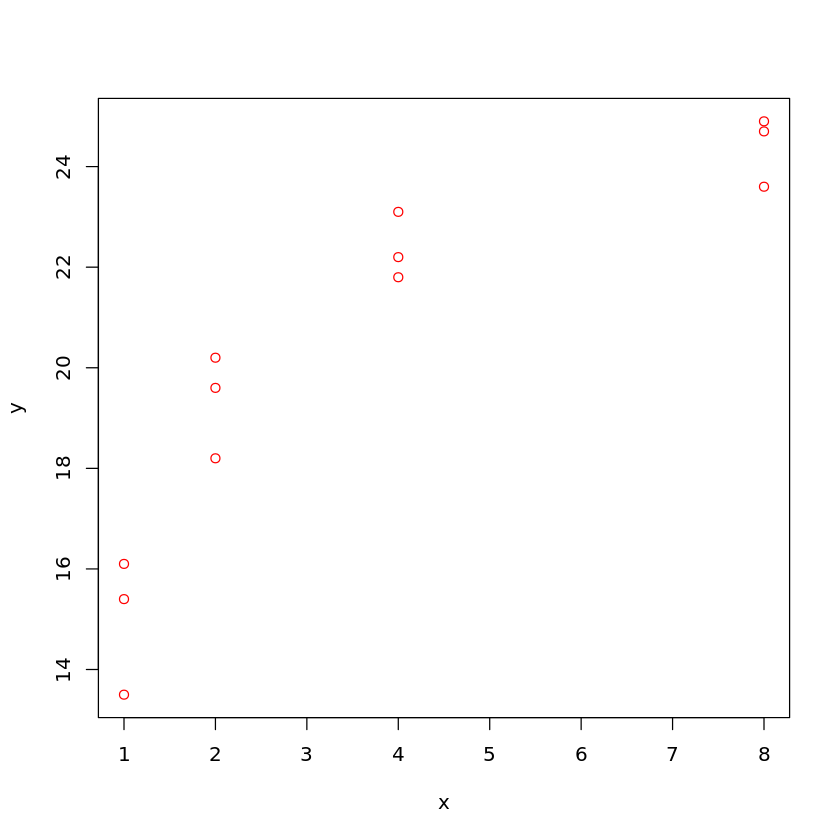

In [3]:
plot(x,y,col="red")

### 2) $\log_{10} x$를 계산하고 $\log_{10} x$에 대한 y값의 산점도를 그려라.

In [6]:
logx <- log(x,base=10)
logx

[1] 0.00000 0.00000 0.00000 0.30103 0.30103 0.30103 0.60206 0.60206 0.60206
[10] 0.90309 0.90309 0.90309

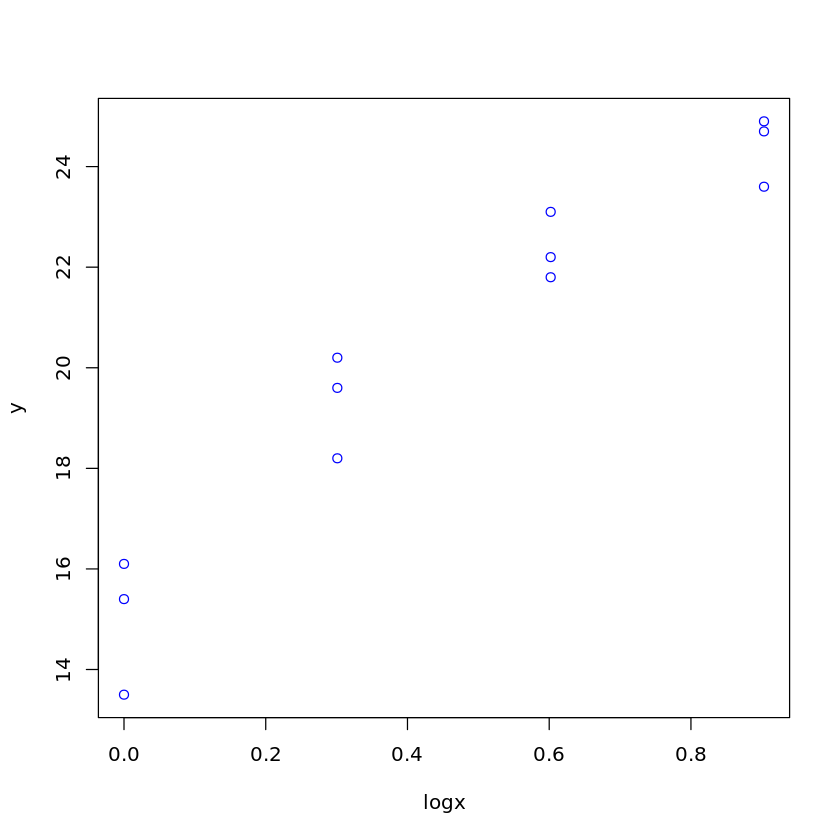

In [7]:
plot(logx,y,col="blue")

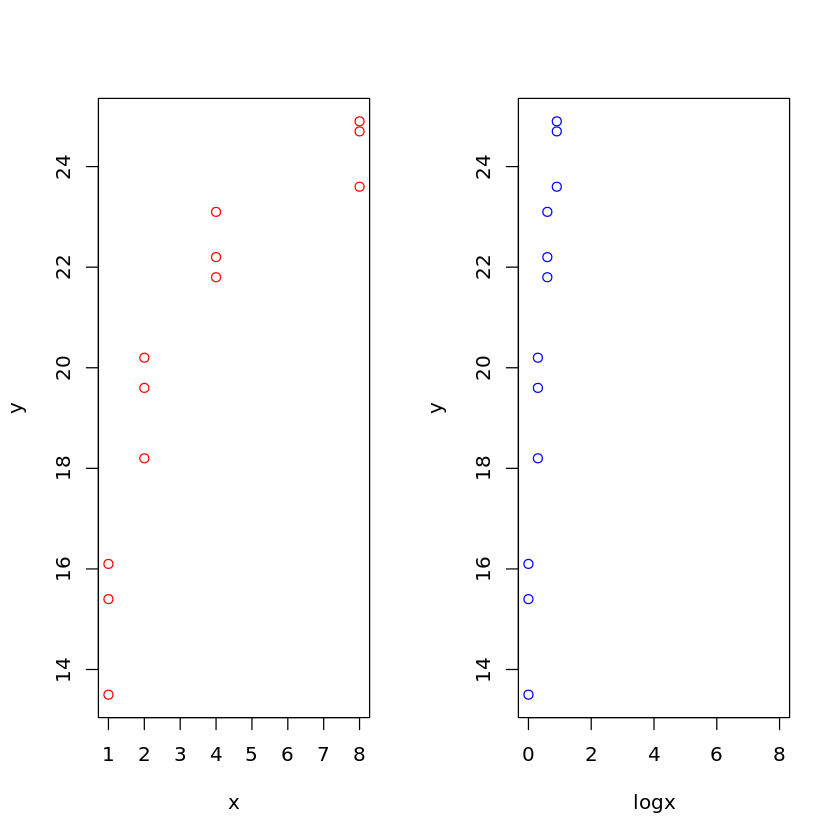

In [21]:
par(mfrow=c(1,2))
plot(x,y,col="red")
plot(logx,y,col="blue",xlim=c(0,8)) # xlim 으로 x범위 조정

### 3) 위 1)과 2) 중 어느 것이 더 선형에 가까운가?

> 2)의 로그 그래프가 같은 범위에서 더 선형에 가깝다.

______________________________

# 5.3
`-` 연습문제 5.2의 자료에 대해 다음 질문에 답하여라.

### 1) $ y = \beta_0 + \beta_1 x + \epsilon $ 를 적합시키고 $MSE$ 를 구하여라.

In [27]:
lm53 <- lm(y~x)
coefficients(lm53)

(Intercept)           x 
  15.813043    1.189855

> $y= 15.51 + 1.19x$

In [28]:
anova(lm53)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
x,1,122.10888,122.108877,34.1147,0.0001636405
Residuals,10,35.79362,3.579362,NA,NA


> $MSE$ : Mean Square Residuals = 3.579362

### 2) $ y = \beta_0 + \beta_1 \log_{10} x + \epsilon $ 를 가정하고 $MSE$ 를 계산하여라.

In [30]:
lm53log <- lm(y~logx)
anova(lm53log)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
logx,1,146.32817,146.328167,126.4247,5.374543e-07
Residuals,10,11.57433,1.157433,NA,NA


> $MSE$ : Mean Square Residuals = 1.157433

### 3) 위 1)과 2)의 모형 중 어느 것이 더 적합한지 $MSE$ 를 이용하여 비교하여라. 

> $\log_{10} x$ 에서의 $MSE$ 가 더 작다. 즉, 2)의 모형이 더 적합하다.

____________

# 5.12
`-` 다음 과 같은 자료에 대하여

|x|2|6|10|
|---|---|---|---|
|y|4|7|4|

### 1) 단순회귀모형  $ y = \beta_0 + \beta_1 x + \epsilon $ , $ \epsilon \sim N(0,\sigma^2)$을 가정하고 회귀직선을 추정하여라. 또 $\beta_1$ 의 90% 신뢰구간을 구하여라.

In [34]:
x <- c(2, 6, 10)
y <- c(4, 7, 4)
lm512 <- lm(y~x)
coefficients(lm512)
confint(lm512,level = 0.90) # 기울기와 절편의 90% 신뢰구간 

(Intercept)             x 
 5.000000e+00 -4.814324e-16

,5 %,95 %
(Intercept),-13.676329,23.676329
x,-2.733935,2.733935


> 기울기 $\beta_1$의 90% 신뢰구간: $(-2.733935, 2.733935)$

### 2) $ y = \beta_0 + \beta_1 x + \epsilon $ , $ \epsilon \sim N(0,k^2 {x_i}^2)$ 을 가정하여 가중회귀직선을 추정하고 $\beta_1$ 의 90% 신뢰구간을 구하여라.

In [62]:
w512 <- sqrt(1/var(x))



### 3) 위 1), 2)의 결과를 비교하여라

________________

# 5.14
`-` 다음은 어떤 컴퓨터 부품의 과거 14개월(x) 동안의 판매액(y)에 관한 자료이다.

| x | 1   | 2   | 3   | 4   | 5   | 6   | 7   | 8   | 9   | 10  | 11  | 12  | 13  | 14  |
|:-:|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|
| y | 6.0 | 6.3 | 6.1 | 6.8 | 7.5 | 8.0 | 8.1 | 8.5 | 9.0 | 8.7 | 7.9 | 8.2 | 8.4 | 9.0 |

### 1) 데이터의 산점도를 그려라.

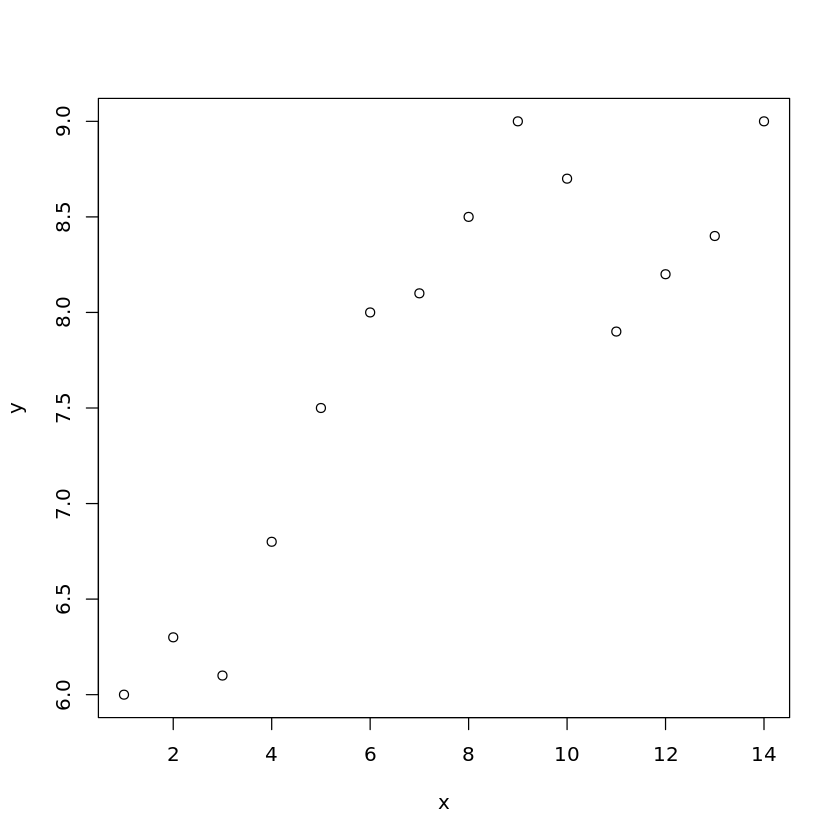

In [49]:
x <- c(1,2,3,4,5,6,7,8,9,10,11,12,13,14)
y <- c(6.0,6.3,6.1,6.8,7.5,8.0,8.1,8.5,9.0,8.7,7.9,8.2,8.4,9.0)
plot(x,y)

### 2) 단순회귀모형을 가정하고 잔차의 산점도를 나타내고 자기상관이 존재하는지를 검토하여라.

In [50]:
lm514 <- lm(y~x)
coefficients(lm514)

(Intercept)           x 
  6.1329670   0.2156044

In [54]:
err <- function(A){
    print(0.215604395604395 * A + 6.13296703296704)
}

 [1] 6.348571 6.564176 6.779780 6.995385 7.210989 7.426593 7.642198 7.857802
 [9] 8.073407 8.289011 8.504615 8.720220 8.935824 9.151429


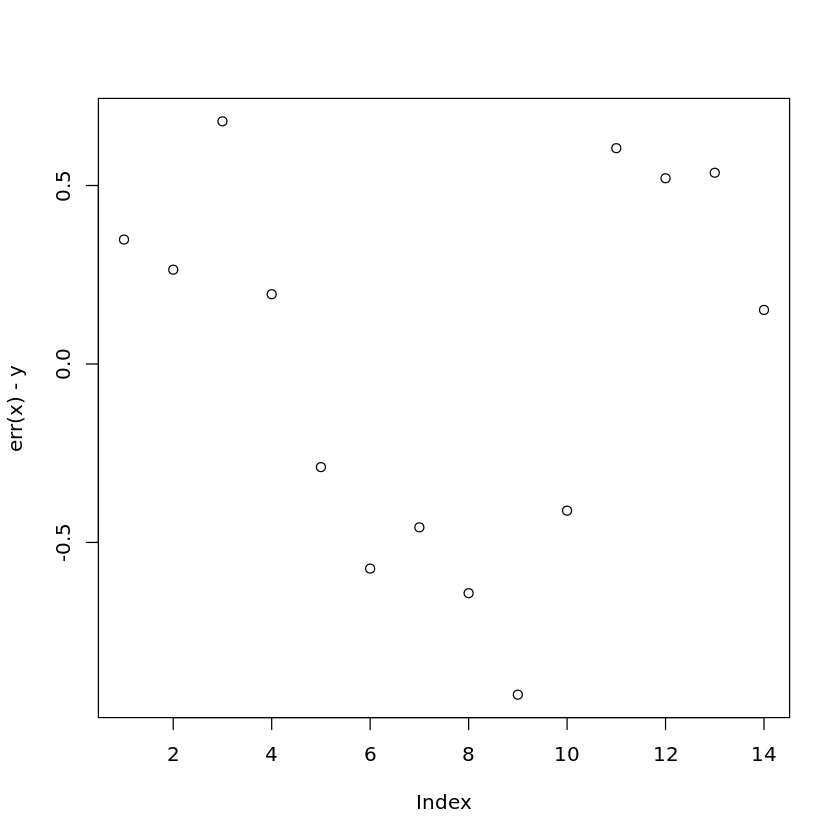

In [57]:
plot(err(x)-y)

### 3) Durbin-Watson d 통계량의 값을 구하여  $H_0 : \rho = 0 , H_1 : \rho \neq 0 $ 을 $\alpha = 0.05 $ 로 검정하여라.

No documentation for ‘lmtest’ in specified packages and libraries:
you could try ‘??lmtest’

### 4) 위 3)의 검정결과는 2)의 산점도에서 얻은 느낌과 일치하는지 논의하여라.